# **Strategy 3: balanced-neg-train-test (p1 & p4 data)**

balanced-neg-train: 2000 positive samples, 4000 negative samples

balanced-neg-test: 317 positive samples, 634 negative samples

In [ ]:
randomly_selected_negative_samples_p1_p4_train = reshape_samples(randomly_selected_negative_samples_p1_p4_train)
randomly_selected_positive_samples_p1_p4_train = reshape_samples(randomly_selected_positive_samples_p1_p4_train)

print(randomly_selected_negative_samples_p1_p4_train.shape)
print(randomly_selected_positive_samples_p1_p4_train.shape)

(4000, 2, 5120)
(2000, 2, 5120)


In [ ]:
# create labels (1 for positive, 0 for negative)
num_positive = len(randomly_selected_positive_samples_p1_p4_train)
num_negative = len(randomly_selected_negative_samples_p1_p4_train)
y_train_p1_p4 = np.concatenate([np.ones(num_positive), np.zeros(num_negative)])

In [ ]:
# combine positive and negative samples
X_train_p1_p4 = np.concatenate([randomly_selected_positive_samples_p1_p4_train, randomly_selected_negative_samples_p1_p4_train], axis=0)

In [ ]:
# shuffle the data
X_train_p1_p4, y_train_p1_p4 = shuffle(X_train_p1_p4, y_train_p1_p4, random_state=42)

In [ ]:
# define and train the classifier
clf = make_pipeline(QUANTTransformer(), StandardScaler(), LDA())
clf.fit(X_train_p1_p4, y_train_p1_p4)

Pipeline(steps=[('quanttransformer', QUANTTransformer()),
                ('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [ ]:
# separate positive and negative samples
positive_indices = [i for i, label in enumerate(y_test_p1_p4) if label == 1]
negative_indices = [i for i, label in enumerate(y_test_p1_p4) if label == 0]

# randomly select 634 negative samples
selected_negative_indices = random.sample(negative_indices, 634)

# combine selected negative and all positive indices
all_selected_indices = positive_indices + selected_negative_indices

# create the new test set with only selected samples
X_test_p1_p4_undersampled = [X_test_p1_p4[i] for i in all_selected_indices]
y_test_p1_p4_undersampled = [y_test_p1_p4[i] for i in all_selected_indices]

In [ ]:
X_test_p1_p4_undersampled_transposed = [sample.T for sample in X_test_p1_p4_undersampled]

In [ ]:
# make predictions using the trained classifier
y_pred_p1_p4_test = clf.predict(X_test_p1_p4_undersampled_transposed)

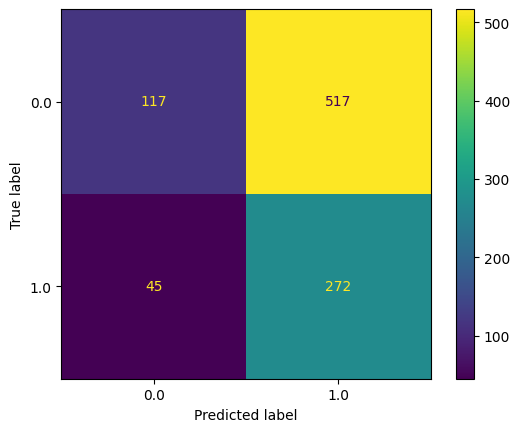

              precision    recall  f1-score   support

           0       0.72      0.18      0.29       634
           1       0.34      0.86      0.49       317

    accuracy                           0.41       951
   macro avg       0.53      0.52      0.39       951
weighted avg       0.60      0.41      0.36       951



In [ ]:
# generate and display confusion matrix
cm = confusion_matrix(y_test_p1_p4_undersampled, y_pred_p1_p4_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# print report
report = classification_report(y_test_p1_p4_undersampled, y_pred_p1_p4_test, target_names=['0', '1'])
print(report)